In [1]:
# 1. Pick a dataset to work with. 
# 2. Clone / download the dataset
# 3. Undesrand and describe what the dataset does and what is the goal which is necessary to accomplish
# 4. Divide the data to the training and testing set. 
#    At start lets start with istribution 60-40%. This ratio should be tweaked with to find and optimal solution
# 5. Pick right activation function and test which one is the most suitable for the problem in hand
# 6. Do a proper visualization od the data we gathered while whole process:
# 6a. Error
# 6b. Accuracy
# 6c. Weights (? - Depends on the neural network and it complexity)
# 6d. Struncture of the network (either visual or the Keras print visualization of the neural network thru "description")

## 1. Ziskavanie dát 

In [2]:
# importing keras library to work with the Neural Networks design
import keras
# importing padnas to work with files / csv-s containing the datasets
import pandas as pd
# importing numpy lib for faster manipulation with data supporting math 
import numpy as np

# lets prepare both of them and  later we will see which one is better for visualization of the data
import seaborn as sb
import matplotlib as plt

# importing the lib to help to split testing and training data which will be later used
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# načítanie datasetu do dataframe z cvs file
# povodný súbor pochádza z https://www.kaggle.com/murderaccountability/homicide-reports
# a obsahuje správy o vraždách za roky 1980 - 2014 z rôznych štátov USA
dataset = pd.read_csv("database.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# zobrazte prvých 5 riadkov pre rýchly náhľad ako dáta vyzerajú
dataset.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [5]:
#
dataset.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [6]:
# tvar DataFrame (riadky, stĺpce)
# porozumieť množstvu dát, s ktorými pracujeme
# môžeme vidieť, že náš datasetmá tvar matice obsahujú 638 454 riadkov a 24 stlpcov
dataset.shape

(638454, 24)

In [7]:
# popis dát
# dôležitou informáciou je, že náš dataset je kompletný
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [8]:
# dataset["Perpetrator Age"] = pd.to_replace(dataset["Perpetrator Age"], regex = {r'\s': '0'})
# dataset["Perpetrator Age"] = pd.to_numeric(dataset["Perpetrator Age"])

In [9]:
# skontrolujte, či existujú nulové hodnoty
dataset.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

### Vlastnosti datasetu
<ol>
    <li>Record ID: Číslo záznamu vraždy </li>
    <li>Agency Code: Kódové meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Name: Plné meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Type: Typ zastupiteľstva: a. 'Municipal Police', b. 'County Police', c. 'State Police', d. 'Sheriff',
       e. 'Special Police', f. 'Regional Police', g. 'Tribal Police'</li>
    <li>City: Mesto, v ktorom sa stal zločin. </li>
    <li>State: Štát, v ktotom sa zločin odohral. </li>
    <li>Year: Rok spáchaného zločinu, z časového obdobia od roku 1980 - 2014 </li>
    <li>Month: Mesiac, v ktorom sa zločin stal. Formát je January - December  </li>
    <li>Incident: Číslená hodnota koľko zločinov sa stalo za dané obobie. Napríklad za Marec 1980 bola spáchaná vražda v Aliaške druhý krát. Hodnota bude 2. </li>
    <li>Crime type: Klasfikuje čin do dvoch kategórií: 'Murder or Manslaughter' == 'Vražda alebo Zabitie' a 'Manslaughter by Negligence' == 'Zabitie z nedbanlivosti' </li>
    <li>Crime Solved: Klasifikuje, či bol zločiť vyrierený. Bud 'Yes' == 'Áno' alebo 'No' == 'Nie' </li>
    <li>Victim Sex: Klasifikácia pohlavia obete. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c.'Unknown' == 'Neidentifikované' </li>
    <li>Victim Age: Vek obete. </li>
    <li>Victim Race: Krasifikácia posla rasy obete. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Victim Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic'  </li>
    <li>Perpetrator Sex: Klasifikácia pohlavia páchteľa. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c. 'Unknown' == 'Neidentifikované' </li>
    <li>Perpetrator Age:  Vek páchateľa. Ak vek páchateľa je neznámy, záznam obsahuje nulu. </li>
    <li>Perpetrator Race: Krasifikácia posla rasy páchateľa. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Perpetrator Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic' </li>
    <li>Relationship: Klasifikikácia vsťahu medzi obeťou a páchateľom. 28 rôznych kategórií. </li>
    <li>Weapon: Klasifikácia podľa zbrane, ktorá bola použitá pri čine. 17 rôznych kategórií. </li>
    <li>Victim Count: Počet obetí. </li>
    <li>Perpetrator Count: Počet páchateľov. </li>
    <li>Record Source: Klasifikácia zdroja informácií. Informácie pochádzajú z 2 zdrojov: a. 'FBI' == 'Federal Bureau of Investigation' b. 'FIOA' == 'Freedom of Information Act' </li>
</ol>

In [10]:
dataset['Agency Type'].unique()

array(['Municipal Police', 'County Police', 'State Police', 'Sheriff',
       'Special Police', 'Regional Police', 'Tribal Police'], dtype=object)

In [11]:
dataset['Record Source'].value_counts()

FBI     616647
FOIA     21807
Name: Record Source, dtype: int64

In [35]:
temp = dataset.pivot_table(index = ['Relationship'],aggfunc ='size')

<AxesSubplot:xlabel='Relationship'>

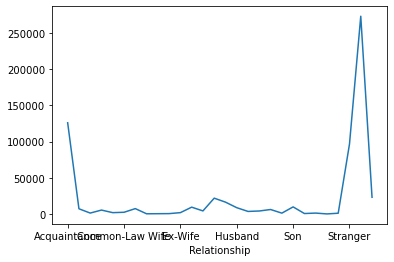

In [42]:
temp.plot()

In [13]:
# we can see that we have some odd data here and that in one month there have been 999 events of murder and age f victim was 998
dataset.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [14]:
numerical_cols_dataset = dataset.select_dtypes(['int64','float64','datetime64[ns, UTC]'])
cathegorical_cols_dataset = dataset.select_dtypes(['object'])


array([[<AxesSubplot:title={'center':'Record ID'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Incident'}>,
        <AxesSubplot:title={'center':'Victim Age'}>],
       [<AxesSubplot:title={'center':'Victim Count'}>,
        <AxesSubplot:title={'center':'Perpetrator Count'}>]], dtype=object)

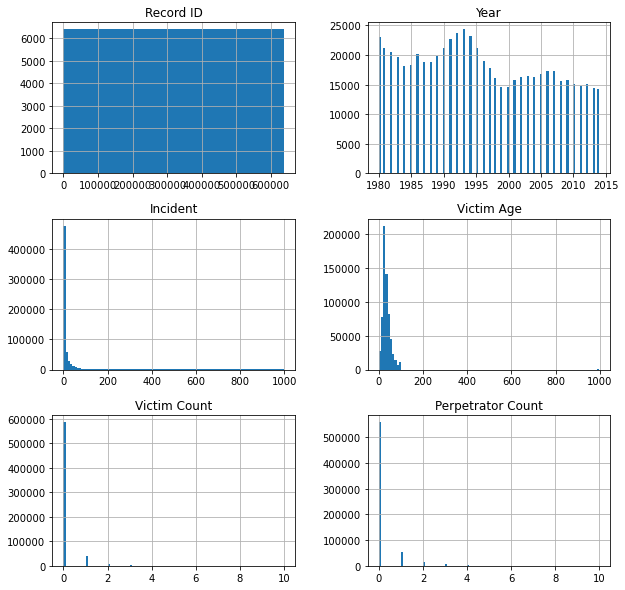

In [15]:
numerical_cols_dataset.hist(figsize = (10,10),bins=100)

In [16]:
cathegorical_cols_dataset

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,January,Murder or Manslaughter,Yes,Male,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,Yes,Male,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,Yes,Male,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,WY01500,Park County,Sheriff,Park,Wyoming,January,Murder or Manslaughter,No,Male,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,FBI
638450,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,June,Murder or Manslaughter,Yes,Male,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,FBI
638451,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,September,Murder or Manslaughter,Yes,Female,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,FBI
638452,WY01800,Sublette County,Sheriff,Sublette,Wyoming,December,Murder or Manslaughter,Yes,Male,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,FBI


In [28]:
cathegorical_frequency = [{"Agency Code": (cathegorical_cols_dataset['Agency Code'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Agency Name": (cathegorical_cols_dataset['Agency Name'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Agency Type": (cathegorical_cols_dataset['Agency Type'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"City": (cathegorical_cols_dataset['City'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"State": (cathegorical_cols_dataset['State'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Month": (cathegorical_cols_dataset['Month'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Crime Type": (cathegorical_cols_dataset['Crime Type'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Crime Solved": (cathegorical_cols_dataset['Crime Solved'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Victim Sex": (cathegorical_cols_dataset['Victim Sex'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Victim Race": (cathegorical_cols_dataset['Victim Race'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Victim Ethnicity": (cathegorical_cols_dataset['Victim Ethnicity'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Perpetrator Sex": (cathegorical_cols_dataset['Perpetrator Sex'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Perpetrator Age": (cathegorical_cols_dataset['Perpetrator Age'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Perpetrator Race": (cathegorical_cols_dataset['Perpetrator Race'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Perpetrator Ethnicity": (cathegorical_cols_dataset['Perpetrator Ethnicity'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Relationship": (cathegorical_cols_dataset['Relationship'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Weapon": (cathegorical_cols_dataset['Weapon'].value_counts()/cathegorical_cols_dataset.shape[0])},
                          {"Record Source ": (cathegorical_cols_dataset['Record Source'].value_counts()/cathegorical_cols_dataset.shape[0])},]

In [29]:
cathegorical_value_count = [{"Agency Code": cathegorical_cols_dataset['Agency Code'].value_counts()},
                            {"Agency Name": cathegorical_cols_dataset['Agency Name'].value_counts()},
                            {"Agency Type": cathegorical_cols_dataset['Agency Type'].value_counts()},
                            {"City": cathegorical_cols_dataset['City'].value_counts()},
                            {"State": cathegorical_cols_dataset['State'].value_counts()},
                            {"Month": cathegorical_cols_dataset['Month'].value_counts()},
                            {"Crime Type": cathegorical_cols_dataset['Crime Type'].value_counts()},
                            {"Crime Solved": cathegorical_cols_dataset['Crime Solved'].value_counts()},
                            {"Victim Sex": cathegorical_cols_dataset['Victim Sex'].value_counts()},
                            {"Victim Race": cathegorical_cols_dataset['Victim Race'].value_counts()},
                            {"Victim Ethnicity": cathegorical_cols_dataset['Victim Ethnicity'].value_counts()},
                            {"Perpetrator Sex": cathegorical_cols_dataset['Perpetrator Sex'].value_counts()},
                            {"Perpetrator Age": cathegorical_cols_dataset['Perpetrator Age'].value_counts()},
                            {"Perpetrator Race": cathegorical_cols_dataset['Perpetrator Race'].value_counts()},
                            {"Perpetrator Ethnicity": cathegorical_cols_dataset['Perpetrator Ethnicity'].value_counts()},
                            {"Relationship": cathegorical_cols_dataset['Relationship'].value_counts()},
                            {"Weapon": cathegorical_cols_dataset['Weapon'].value_counts()},
                            {"Record Source ": cathegorical_cols_dataset['Record Source'].value_counts()},]

In [30]:
cathegorical_dataset_frequency = pd.DataFrame(cathegorical_frequency)

In [34]:
cathegorical_frequency

[{'Agency Code': NY03030    0.060170
  CA01942    0.037063
  ILCPD00    0.033410
  MI82349    0.026949
  TXHPD00    0.020175
               ...   
  PA01103    0.000002
  ME00501    0.000002
  PA00709    0.000002
  IL08700    0.000002
  GA09904    0.000002
  Name: Agency Code, Length: 12003, dtype: float64},
 {'Agency Name': New York                          0.060170
  Los Angeles                       0.045433
  Chicago                           0.033410
  Detroit                           0.026949
  Houston                           0.020434
                                      ...   
  Department of Natural Resource    0.000002
  East Palestine                    0.000002
  Wolfforth                         0.000002
  Winneshiek                        0.000002
  State Patrol: Cedar County        0.000002
  Name: Agency Name, Length: 9216, dtype: float64},
 {'Agency Type': Municipal Police    0.772219
  Sheriff             0.164964
  County Police       0.035544
  State Police      

In [32]:
cathegorical_dataset_frequency

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
0,NY03030 0.060170 CA01942 0.037063 ILCPD0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,New York 0.060170 Los...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Municipal Police 0.772219 Sheriff ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Los Angeles 0.069717 New York 0.06019...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,California 0.156288 Texas ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,July 0.091935 August 0.090957 De...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,Murder or Manslaughter 0.985722 Manslau...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes 0.701964 No 0.298036 Name: Crime So...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male 0.773940 Female 0.224519 Unknow...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White 0.497173 Blac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
cathegorical_dataset_value_count = pd.DataFrame(cathegorical_value_count)

In [33]:
cathegorical_dataset_value_count

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
0,NY03030 38416 CA01942 23663 ILCPD00 2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,New York 38416 Los An...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Municipal Police 493026 Sheriff ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Los Angeles 44511 New York 38431 Cook...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,California 99783 Texas ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,July 58696 August 58072 December...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,Murder or Manslaughter 629338 Manslaugh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes 448172 No 190282 Name: Crime Solved...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male 494125 Female 143345 Unknown ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White 317422 Black ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cathegorical_cols_dataset['Agency Code'].value_counts()

NY03030    38416
CA01942    23663
ILCPD00    21331
MI82349    17206
TXHPD00    12881
           ...  
PA01103        1
ME00501        1
PA00709        1
IL08700        1
GA09904        1
Name: Agency Code, Length: 12003, dtype: int64

## 2. Pochopenie a Vizualizácia dát